In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import save_model
import os

In [3]:
df = pd.read_csv('data_cleaned.csv')
df=df[0:50000]

In [4]:
statements = df['statement'].values  
labels = df['speaker'].values  

In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  

In [6]:
tfidf = TfidfVectorizer()  
X = tfidf.fit_transform(statements).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

c:\Users\harsh\anaconda3\envs\Machinelearning\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.9680 - loss: 0.1148 - val_accuracy: 0.9958 - val_loss: 0.0115
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9959 - val_loss: 0.0123
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9998 - loss: 4.8682e-04 - val_accuracy: 0.9959 - val_loss: 0.0132
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 1.0000 - loss: 6.1534e-05 - val_accuracy: 0.9960 - val_loss: 0.0139
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 1.0000 - loss: 2.3940e-05 - val_accuracy: 0.9961 - val_loss: 0.0145


In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy is : {:.2f}%".format(test_accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9970 - loss: 0.0107
Test accuracy is : 99.59%


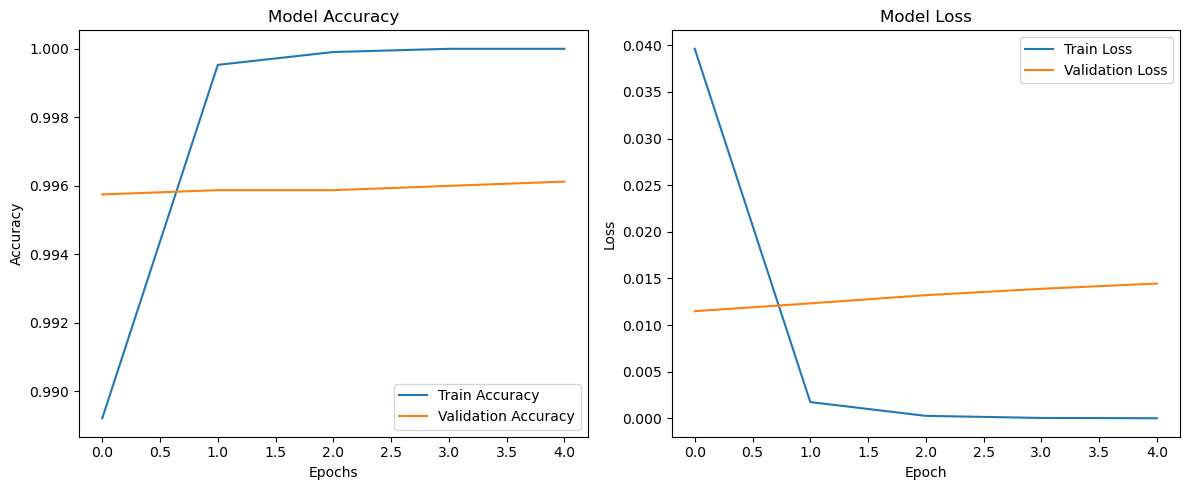

In [10]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model.save("FFnn.h5")

In [12]:
model_size = os.path.getsize("FFnn.h5")
print("model size = ", model_size)

model size =  55220720
